## EE5907 CA1 Part 1

1. Generate 50 2D-data points using the following function: $y=sin(x^2+1)$ 
2. Add Gaussian random noise to the data
3. Show the original curve line and the noisy data.

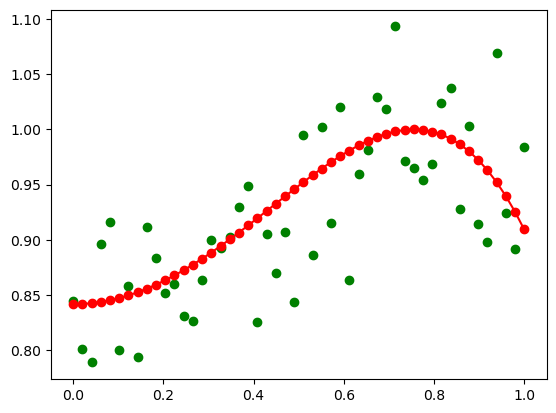

In [3]:

import numpy as np
import matplotlib.pyplot as plt

# 1&2&3. data generating
sig = 0.05

x = np.linspace(0, 1, 50)
X = x.reshape(-1, 1)
N = x.shape[0] # No. input samples
# print (X.shape)
y = np.sin(x**2 + 1)
Y = y.reshape(y.shape[0],1)
yn = y + np.random.normal(0, sig, size=50) 
Yn = yn.reshape(yn.shape[0],1)

plt.scatter(x, yn, c='green')
plt.scatter(x, y, c='red')
plt.plot(x, y, color='r')
plt.show()


4. Fit the generated noisy data using the MAP as discussed in class.

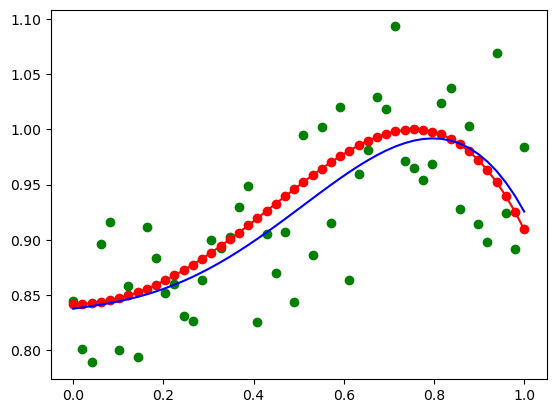

In [18]:

M = 6 # order of polynomial func.
beta = 1/(sig**2)
alpha = 0.05

def mapreg(data, m, a, n = N):
    xmat = np.zeros((n, m))
    # print(xmat.shape, X.shape)

    for col in range(m):
        for row in range(n):
            xmat[row, col] = X[row]**col
    # print(xmat)

    weight = beta * np.dot(np.dot(np.linalg.inv(beta * np.dot((xmat.T),xmat) + \
                                                a * np.eye(m)), (xmat.T)), data)

    pred = np.dot(xmat, weight)
    return weight, pred

weight, y_pred = mapreg(Yn, M, alpha, N)

plt.scatter(x, yn, c='green')
plt.scatter(x, y, c='red')
plt.plot(x, y, color='r')
plt.plot(x, y_pred, color='b')
plt.show()


5. Compute and display the total absolute error value (between the predicted and the correct ones) of using the computed $w$.

In [19]:

def err(pred):
    err = 0
    for num in range(pred.shape[0]):
        err = err + abs(pred[num]-y[num])
    return err 

print('the total absolute error value is {} \n'.format(err(y_pred)))


the total absolute error value is [0.57987742] 



6. Display the estimated values of $w$

In [20]:

print('the estimated values of w are \n {} \n'.format(weight))


the estimated values of w are 
 [[ 0.83743258]
 [ 0.05432932]
 [ 0.03605823]
 [ 0.88174466]
 [-0.90168312]
 [ 0.01766721]] 



7. Experiment with your code by changing $M$ and $\alpha$ (the coefficient of the regularization/prior term) to various values, and then show the plots. On each the plot, you must show the values of $M$ and $\alpha$.

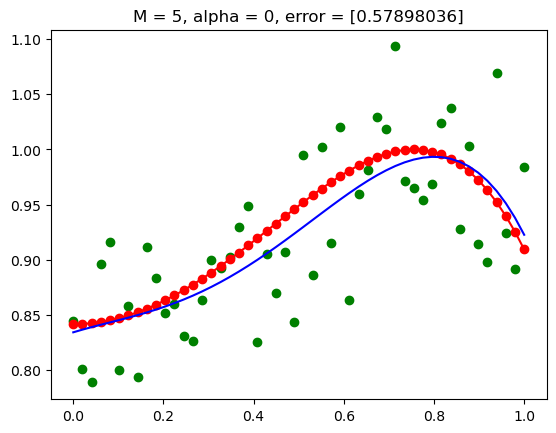

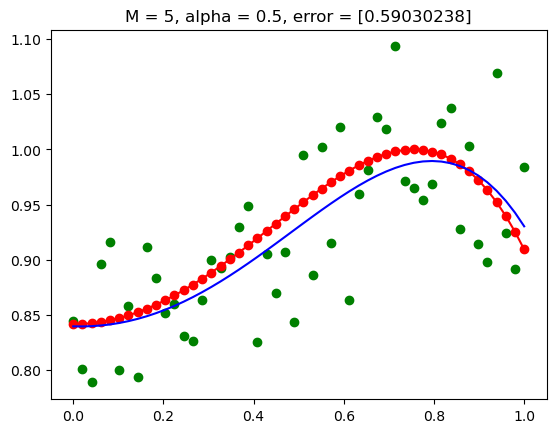

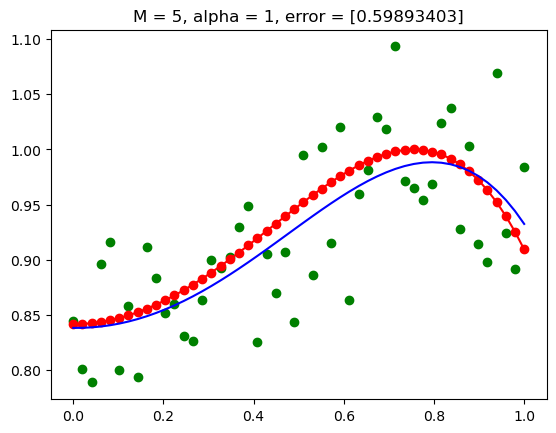

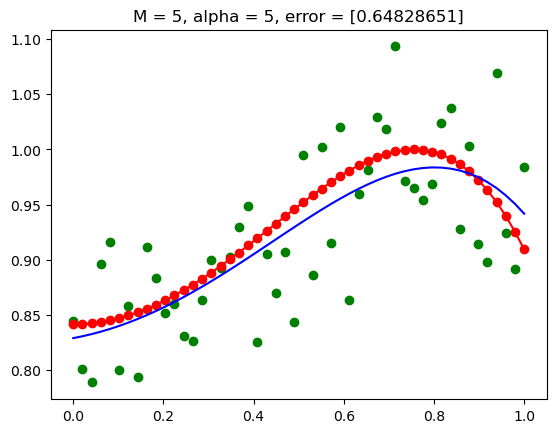

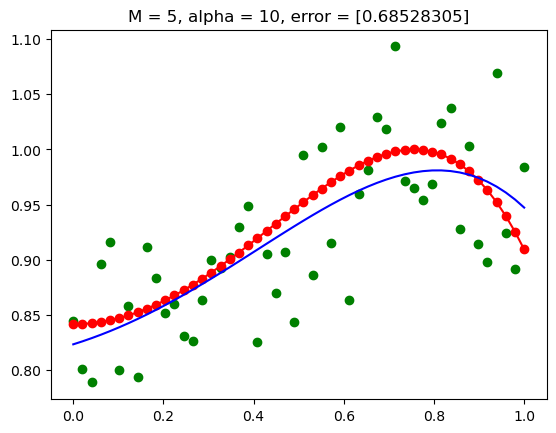

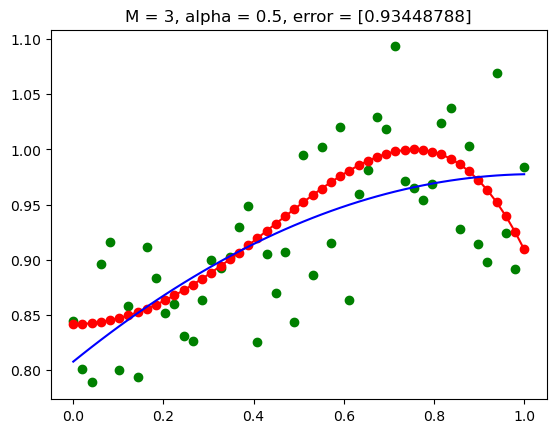

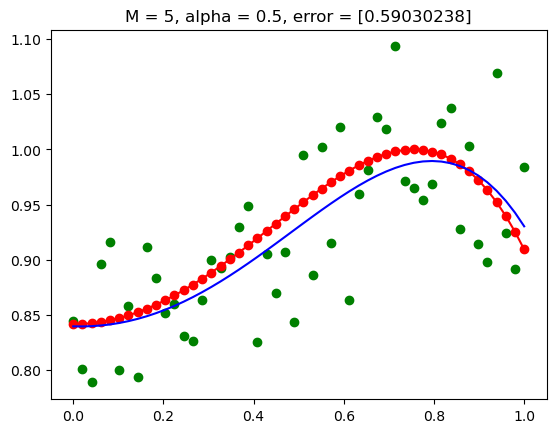

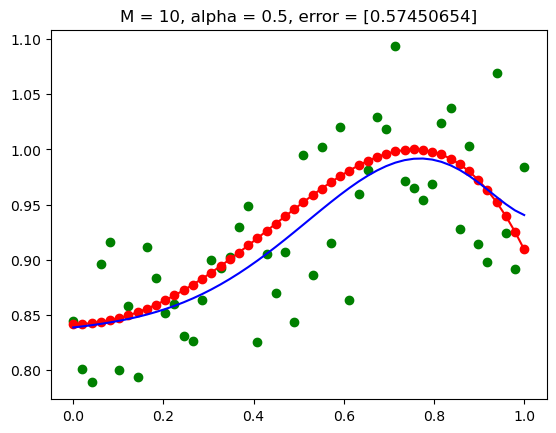

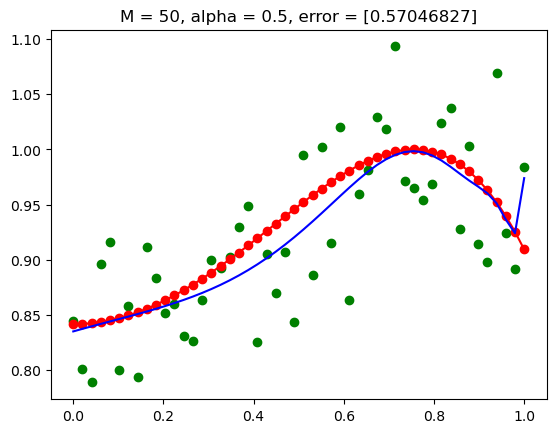

In [21]:

def showfig(m, a, n = N):

    w1, y1_pred = mapreg(Yn, m, a)
    
    plt.title('M = {}, alpha = {}, error = {}'.format(m, a, err(pred=y1_pred)))
    plt.scatter(x, yn, c='green')
    plt.scatter(x, y, c='red')
    plt.plot(x, y, color='r')
    plt.plot(x, y1_pred, color='b')
    plt.show()

showfig(m = 5, a = 0)
showfig(m = 5, a = 0.5)
showfig(m = 5, a = 1)
showfig(m = 5, a = 5)
showfig(m = 5, a = 10)

showfig(m = 3, a = 0.5)
showfig(m = 5, a = 0.5)
showfig(m = 10, a = 0.5)
showfig(m = 50, a = 0.5)


8. From the experiment in #7, discuss how M and alpha influence on the fitting accuracy.

A proper value of $M$ is a promise for good fitting. A smaller value may lead to underfitting and a larger one may cause overfitting, both of which decreases the fitting accuracy. While for a fixed $M$,  as the value of $\alpha$ increases, the total error also increases.
